# 🎓 Handwritten Digit Recognition using Softmax Regression

📝 **Overview**

This project demonstrates a classic machine learning problem: **classifying handwritten digits**. Using the famous **MNIST dataset**, we build and train a **Softmax Regression** model (a multiclass logistic regression) to recognize digits from 0 to 9. This serves as an excellent introduction to multiclass classification and the fundamentals of image recognition.




📊 **Dataset**

The project uses the **MNIST (Modified National Institute of Standards and Technology)** dataset. It is a benchmark dataset in the machine learning community and consists of:

**70,000** grayscale images of handwritten digits.

Each image is **28x28 pixels**.

The dataset is pre-split into a standard training set of **60,000 images** and a test set of **10,000 images**.


🧠 **Model: Softmax Regression**

We use Softmax Regression as our classification model. It's a generalization of logistic regression that can handle problems with more than two classes.

The model calculates a probability for each class (0 through 9) for a given input image. The class with the highest probability is chosen as the final prediction. This is implemented using **scikit-learn's LogisticRegression classifier** with the **multi_class='multinomial'** parameter.

In [1]:
import ssl
# For data loading and manipulation (To fetch the MNIST dataset from OpenML)
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay # To draw confusion matrix using the dataset
import matplotlib.pyplot as plt

In [2]:
# To avoid errors which may appear when fetching the dataset remotely
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
# Load data from https://www.openml.org/d/554 (MNIST dataset - 70000 images (rows) and 784 columns (as 784 pixels) in total per image)
# X contains the image data (features), y contains the labels (target digit)
# as_frame=False means we want the data as NumPy arrays (not pandas DataFrames)
print("Fetching MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
print("Dataset loaded successfully.")

Fetching MNIST dataset...
Dataset loaded successfully.


In [4]:
# Let's take a look at Shape and Data Type
print(X)
print(type(X))
print("Shape of X:", X.shape)

print("-------------------------")

print(y)
print(type(y))
print("Shape of y:", y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
Shape of X: (70000, 784)
-------------------------
['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
Shape of y: (70000,)


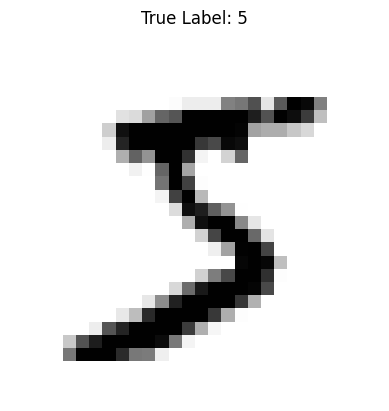

In [5]:
# X has 70,000 rows (one for each image) and 784 columns (28x28 pixels flattened)
# y has 70,000 labels corresponding to each image

# Let's visualize a single digit
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28, 28)
true_label = y[some_digit_index]

# cmap="binary" displays the image in black and white
plt.imshow(some_digit_image, cmap="binary")
plt.title(f"True Label: {true_label}")
plt.axis("off")
plt.show()

In [6]:
# 1. Split the data (60,000 for training, 10,000 for testing)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2. Scale the pixel values to be between 0 and 1
# This improves performance for many algorithms (Bcz ML models converge faster with normalized data)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

print("Data has been split and scaled.")
print("Training set size:", len(X_train_scaled))
print("Test set size:", len(X_test_scaled))

Data has been split and scaled.
Training set size: 60000
Test set size: 10000


In [7]:
# Create the Softmax Regression model
# multi_class='multinomial' is used for multi-class classification, means here to use the softmax function
# Not only Softmax but also there are other variants for multi-class classification
# The 'lbfgs' solver is a good choice for this problem (is a popular optimization algorithm for logistic regression)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model on the scaled training data
print("Training the model... (This may take a moment)")
softmax_reg.fit(X_train_scaled, y_train)
print("Training complete! ✅")

Training the model... (This may take a moment)


C:\Users\GRB\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training complete! ✅


Model Accuracy on Test Set: 0.9259

Displaying Confusion Matrix...
ax: Axes(0.125,0.11;0.775x0.77)


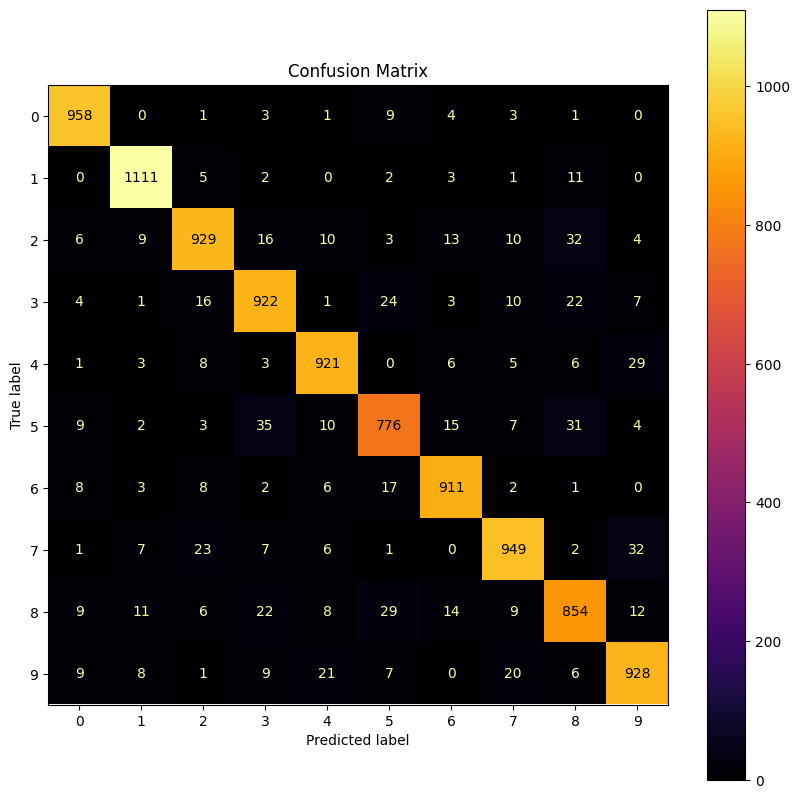

In [8]:
# Make predictions on the test set
y_pred = softmax_reg.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

# Display the confusion matrix to see where the model made mistakes
print("\nDisplaying Confusion Matrix...")
fig, ax = plt.subplots(figsize=(10, 10)) # Set the figure size as 10x10 inches
print("ax:",ax) # Debug line: Check the Axes object
ConfusionMatrixDisplay.from_estimator(softmax_reg, X_test_scaled, y_test, ax=ax, cmap='inferno')
plt.title("Confusion Matrix")
plt.show()

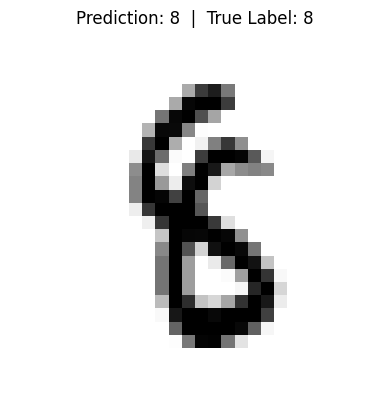

In [9]:
# Pick a random image from the test set
some_index = 1502
some_digit = X_test[some_index]
some_digit_label = y_test[some_index]

# Remember to scale the single image just like the training data
some_digit_scaled = some_digit / 255.0

#print(some_digit_scaled.reshape(1, -1))

# The model expects a 2D array, so we reshape our 1D image array
prediction = softmax_reg.predict(some_digit_scaled.reshape(1, -1))
#print(prediction)

# Let's see the result!
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.title(f"Prediction: {prediction[0]}  |  True Label: {some_digit_label}")
plt.axis("off")
plt.show()